In [85]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
pokemon = pd.read_csv('pokemon.csv')

In [86]:
pokemon.head()

,pokedex_number,name,japanese_name,base_total,attack,defense,sp_attack,sp_defense,speed,hp,capture_rate,experience_growth,type1,type2,classification,generation,is_legendary,x,y
0,1,Bulbasaur,Fushigidaneフシギダネ,318,49,49,65,65,45,45,45,1059860,grass,poison,Seed Pokémon,1,0,2.002712,-23.850000
1,2,Ivysaur,Fushigisouフシギソウ,405,62,63,80,80,60,60,45,1059860,grass,poison,Seed Pokémon,1,0,-4.191872,-1.011356
2,3,Venusaur,Fushigibanaフシギバナ,625,100,123,122,120,80,80,45,1059860,grass,poison,Seed Pokémon,1,0,16.135290,25.569370
3,4,Charmander,Hitokageヒトカゲ,309,52,43,60,50,65,39,45,1059860,fire,NaN,Lizard Pokémon,1,0,3.716781,-33.844860
4,5,Charmeleon,Lizardoリザード,405,64,58,80,65,80,58,45,1059860,fire,NaN,Flame Pokémon,1,0,14.146769,-2.513509


In [87]:
pokemon.shape

(801, 19)

In [88]:
x0=pokemon['attack']
x1=pokemon['defense']
x2=pokemon['sp_attack']
x3=pokemon['sp_defense']
x4=pokemon['speed']
x5=pokemon['hp']


In [89]:
w0=((x0-x0.mean()/x0.std(ddof=0))*10+50)
w1=((x1-x1.mean()/x1.std(ddof=0))*10+50)
w2=((x2-x2.mean()/x2.std(ddof=0))*10+50)
w3=((x3-x3.mean()/x3.std(ddof=0))*10+50)
w4=((x4-x4.mean()/x4.std(ddof=0))*10+50)
w5=((x5-x5.mean()/x5.std(ddof=0))*10+50)

In [90]:
x_new = np.vstack([x0,x1,x2,x3,x4,x5,w0,w1,w2,w3,w4,w5])
x_new

array([[  49.        ,   62.        ,  100.        , ...,  101.        ,
         107.        ,   95.        ],
       [  49.        ,   63.        ,  123.        , ...,   53.        ,
         101.        ,  115.        ],
       [  65.        ,   80.        ,  122.        , ...,   97.        ,
         127.        ,  130.        ],
       ...,
       [ 674.60654449,  824.60654449, 1224.60654449, ...,  554.60654449,
         914.60654449, 1174.60654449],
       [ 477.03860374,  627.03860374,  827.03860374, ...,  457.03860374,
         817.03860374,  677.03860374],
       [ 474.03602895,  624.03602895,  824.03602895, ..., 2254.03602895,
         994.03602895,  824.03602895]])

In [91]:
x_new.shape

(12, 801)

In [92]:
# 行と列の逆転
x_new= x_new.T
x_new.shape

(801, 12)

In [93]:
a1=x1*x3
a2=x3*x4
a3=x3*x5
a4=x1*x5

In [94]:
x_new=np.vstack([x0,x1,x2,x3,x4,x5,w0,w1,w2,w3,w4,w5,a1,a2,a3,a4])

In [95]:
x_new = x_new.T
x_new.shape

(801, 16)

In [96]:
# データの標準化
def zscore(x):
    xmean=x.mean()
    xstd=x.std()
    zscore=(x-xmean)/xstd
    return zscore

In [97]:
x0=zscore(x0)
x1=zscore(x1)
x2=zscore(x2)
x3=zscore(x3)
x4=zscore(x4)
x5=zscore(x5)
w0=zscore(w0)
w1=zscore(w1)
w2=zscore(w2)
w3=zscore(w3)
w4=zscore(w4)
w5=zscore(w5)
a1=zscore(a1)
a2=zscore(a2)
a3=zscore(a3)
a4=zscore(a4)

In [98]:
x_new=np.vstack([x0,x1,x2,x3,x4,x5,w0,w1,w2,w3,w4,w5,a1,a2,a3,a4])
x_new=x_new.T
x_new.shape

(801, 16)

In [99]:
x_new

array([[-0.89734877, -0.78028583, -0.1949033 , ..., -0.62391938,
        -0.67337135, -0.94932898],
       [-0.49310509, -0.32528477,  0.26872037, ..., -0.02741716,
        -0.10900157, -0.45546585],
       [ 0.6885303 ,  1.62471975,  1.56686668, ...,  1.49962852,
         1.33578504,  1.44473136],
       ...,
       [ 0.71962597, -0.65028553,  0.79416054, ..., -0.82943428,
         2.00369786,  2.06527431],
       [ 0.90619998,  0.90971809,  1.7214079 , ...,  0.68234095,
         1.04472074,  1.43124812],
       [ 0.53305196,  1.36471914,  1.81413264, ...,  0.82359267,
         1.21538616,  1.24405047]])

In [100]:
from sklearn.feature_selection import SelectPercentile
from sklearn.model_selection import train_test_split

In [101]:
pokemon.target = pokemon['is_legendary']
pokemon.target

/var/folders/wt/r7zhl_jn7pnb6hv_zm0545k40000gn/T/ipykernel_82532/370129298.py:1: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  pokemon.target = pokemon['is_legendary']


0      0
1      0
2      0
3      0
4      0
      ..
796    1
797    1
798    1
799    1
800    1
Name: is_legendary, Length: 801, dtype: int64

In [102]:
pokemon.target.shape

(801,)

In [103]:
x_train,x_test,y_train,y_test = train_test_split(x_new,pokemon.target,test_size = .3)

特徴量を半分に減らしたx_train_selectedの作成

In [104]:
select=SelectPercentile(percentile = 50)

In [105]:
x_train_selected=select.transform(x_train)

NotFittedError: This SelectPercentile instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.

In [77]:
print("x_train.shape: {}".format(x_train.shape))
print("x_train_selected.shape: {}".format(x_train_selected.shape))

x_train.shape: (560, 16)
x_train_selected.shape: (560, 8)


In [78]:
# どの特徴量が選ばれたかをプット
mask = select.get_support()
print(mask)

NotFittedError: This SelectPercentile instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.

([], [])

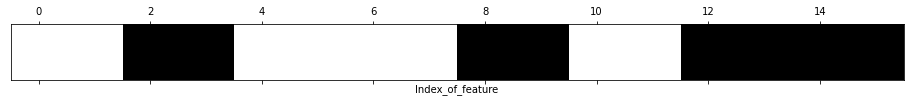

In [79]:
plt.matshow(mask.reshape(1,-1),cmap='gray_r')
plt.xlabel('Index_of_feature')
plt.yticks(())

In [84]:
# 特徴量の個数による正答率の誤差を測定する。
from sklearn.linear_model import LogisticRegression
x_test_selected = select.transform(x_test)

lr=LogisticRegression()
lr.fit(x_train,y_train)

print("score with all features: {:.3f}",format(lr.score(x_test,y_test)))

NotFittedError: This SelectPercentile instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.

In [81]:
y_p = lr.predict(x_test)
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,y_p)

ValueError: X has 16 features, but LogisticRegression is expecting 8 features as input.

In [82]:
# 特徴量を減らした際の結果
lr.fit(x_train_selected,y_train)
print("score with all features: {:.3f}".format(lr.score(x_test_selected,y_test)))

score with all features: 0.900


In [83]:
y_p = lr.predict(x_test_selected)
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,y_p)

array([[217,   0],
       [ 24,   0]])